## 🧩 Exploratory Data Analysis (EDA)

In this section, we performed an extensive exploratory analysis of the *AIML Dataset.csv* to understand its structure and detect early signs of fraudulent transaction patterns.

### Key steps:
- **Imported core libraries**: `pandas`, `numpy`, `matplotlib`, `seaborn` and configured warnings and styles.
- **Loaded and inspected the dataset** using `.head()`, `.info()`, `.shape()`, and `.value_counts()` to understand data size, column types, and missing values.
- **Checked fraud distribution** through `isFraud` and `isFlaggedFraud`, confirming that fraud cases are highly imbalanced.
- **Visualized transaction types** using bar plots and analyzed fraud rates by transaction type.
- **Explored amount patterns** with log-scaled histograms and boxplots (filtered under 50K).
- **Engineered balance-related features**:
  - `balanceDiffOrig` = `oldbalanceOrg - newbalanceOrig`
  - `balanceDiffDest` = `newbalanceDest - oldbalanceDest`
- **Plotted fraud trends over time** (`step` variable) to observe how fraudulent transactions vary across time.
- Identified **top senders/receivers** and **most frequent fraud-origin accounts**.
- Highlighted that **TRANSFER** and **CASH_OUT** transactions dominate fraudulent behavior.
- Generated a **correlation heatmap** to examine relationships among numeric features.
- Investigated **anomalous transactions** where balances drop to zero after transfers, potentially signaling fraud.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info(); df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [7]:
df.isnull().sum().sum()#In case of missing values, fill by imputation(say using average(df.fillna(df.mean(), inplace=True)))

np.int64(0)

In [8]:
df.shape

(6362620, 11)

In [9]:
round(((df["isFraud"].value_counts()[1] / df.shape[0]) * 100), 2)

np.float64(0.13)

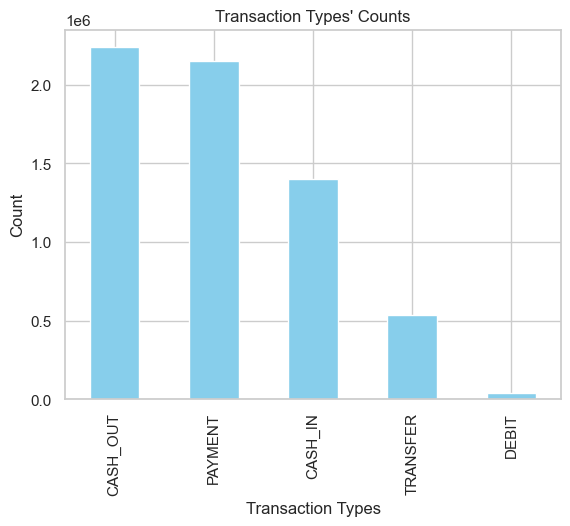

In [10]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types' Counts", color="skyblue")
plt.xlabel("Transaction Types")
plt.ylabel("Count")
plt.show()

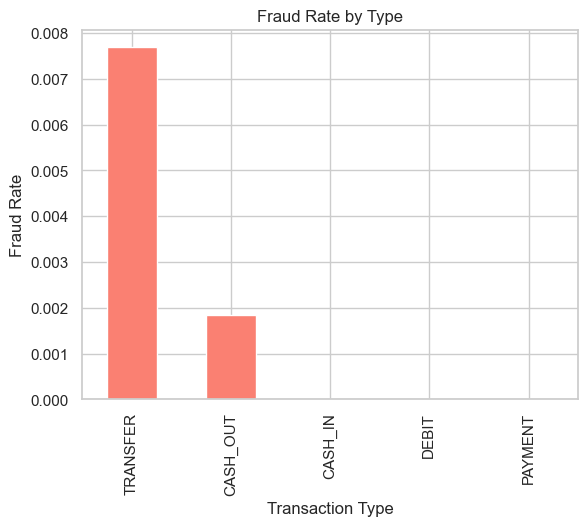

In [11]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

In [12]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

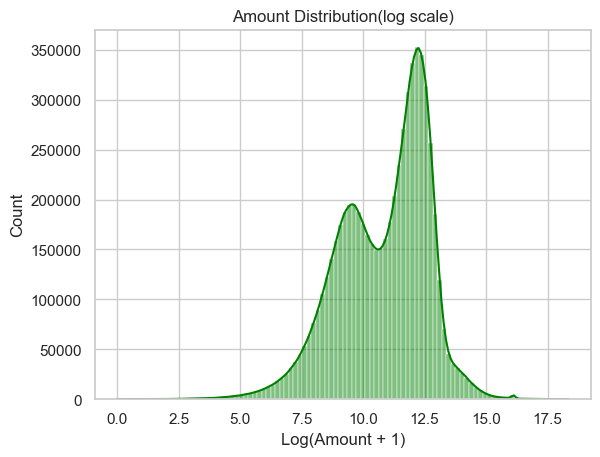

In [13]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Amount Distribution(log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

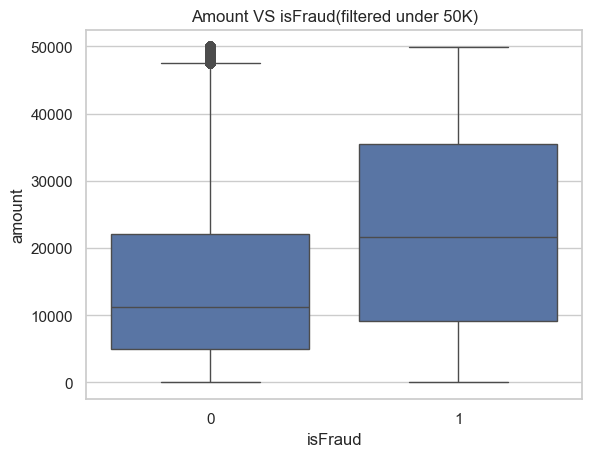

In [14]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("Amount VS isFraud(filtered under 50K)")
plt.show()

In [15]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [16]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [17]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [18]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


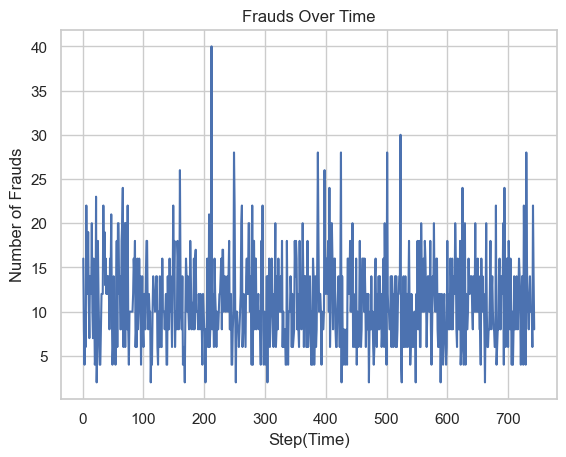

In [19]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")
plt.title("Frauds Over Time")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

In [20]:
df.drop(columns="step", inplace=True)

In [21]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [22]:
top_senders = df["nameOrig"].value_counts().head(10)

In [23]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [24]:
top_receivers = df["nameDest"].value_counts().head(10)

In [25]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [26]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [27]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [28]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

In [29]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

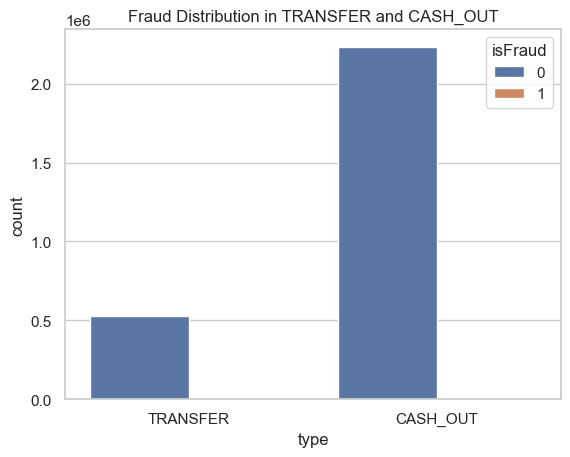

In [30]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in TRANSFER and CASH_OUT")
plt.show()

In [31]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceOrg", "newbalanceDest", "isFraud"]].corr()

In [32]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceOrg,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,-0.002762,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,1.000000,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.998803,0.041837,-0.008148
oldbalanceOrg,-0.002762,1.000000,0.998803,1.000000,0.042029,0.010154
newbalanceDest,0.459304,0.042029,0.041837,0.042029,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,0.010154,0.000535,1.000000


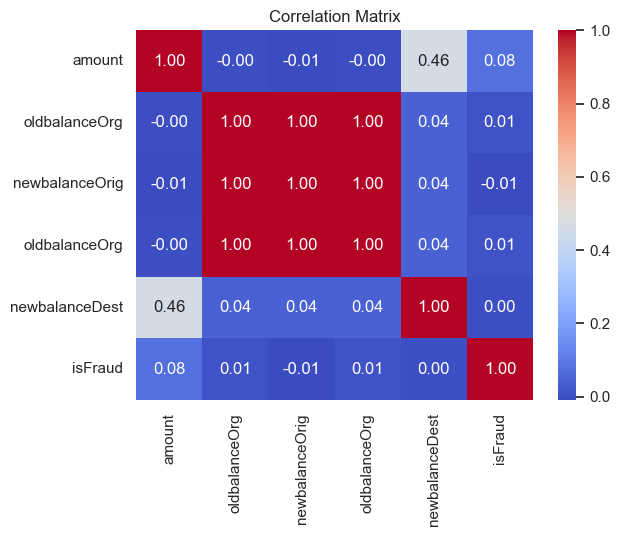

In [33]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [34]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) & 
    (df["newbalanceOrig"] == 0) & 
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [35]:
len(zero_after_transfer)

1188074

In [36]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


## 🤖 Feature Engineering and Training a ML Model

In this section, we prepared the dataset for machine learning, transformed features, trained a classification model, and evaluated its performance.

### Key steps:
- **Cleaned dataset** by removing non-informative columns: `nameOrig`, `nameDest`, and `isFlaggedFraud`.
- Defined:
  - **Target variable (`y`)** = `isFraud`
  - **Feature set (`X`)** = remaining relevant columns.
- **Split data** into training and test sets (70–30, stratified to maintain class balance).
- **Preprocessed features** using `ColumnTransformer`:
  - `StandardScaler` for numerical attributes.
  - `OneHotEncoder` for the categorical feature (`type`).
- **Built a machine learning pipeline** combining preprocessing and a `LogisticRegression` classifier (`class_weight='balanced'`, `max_iter=1000`).
- **Trained and evaluated** the model using:
  - `classification_report`
  - `confusion_matrix`
  - overall accuracy score.
- **Saved the trained model pipeline** as `fraud_detection_pipeline.pkl` using `joblib` for future reuse.

In [37]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# from xgboost import XGBClassifier

In [39]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [40]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [41]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [42]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [43]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric), 
        ("cat", OneHotEncoder(drop="first"), categorical)
    ], 
    remainder="drop"
)

In [46]:
pipeline = Pipeline([
    ("prep", preprocessor), 
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [47]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
y_pred = pipeline.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [50]:
cm = confusion_matrix(y_test, y_pred)

In [51]:
cm

array([[1803125,  103197],
       [    152,    2312]])

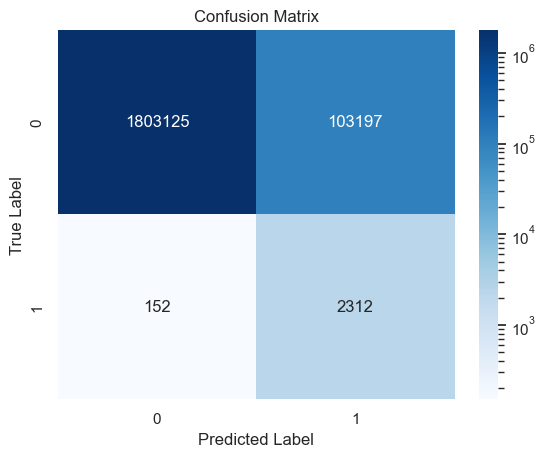

In [52]:
from matplotlib.colors import LogNorm
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', norm=LogNorm())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
pipeline.score(X_test, y_test) * 100

94.58561619793943

### ⚠️ Anomaly Detection

In [54]:
iso_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", IsolationForest(contamination=0.001, random_state=42))
])

X_sample = X.sample(50000, random_state=42)
y_sample = y.loc[X_sample.index]
iso_pipeline.fit(X_sample)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
y_pred_iso = iso_pipeline.named_steps["clf"].predict(iso_pipeline.named_steps["prep"].transform(X_sample))

In [56]:
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

In [57]:
lof_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LocalOutlierFactor(n_neighbors=20, contamination=0.001))
])

y_pred_lof = lof_pipeline.fit_predict(X_sample)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

print("Isolation Forest Results:")
print(confusion_matrix(y_sample, y_pred_iso))
print(classification_report(y_sample, y_pred_iso, digits=4))

print("\nLocal Outlier Factor Results:")
print(confusion_matrix(y_sample, y_pred_lof))
print(classification_report(y_sample, y_pred_lof, digits=4))

Isolation Forest Results:
[[49880    50]
 [   70     0]]
              precision    recall  f1-score   support

           0     0.9986    0.9990    0.9988     49930
           1     0.0000    0.0000    0.0000        70

    accuracy                         0.9976     50000
   macro avg     0.4993    0.4995    0.4994     50000
weighted avg     0.9972    0.9976    0.9974     50000


Local Outlier Factor Results:
[[49886    44]
 [   64     6]]
              precision    recall  f1-score   support

           0     0.9987    0.9991    0.9989     49930
           1     0.1200    0.0857    0.1000        70

    accuracy                         0.9978     50000
   macro avg     0.5594    0.5424    0.5495     50000
weighted avg     0.9975    0.9978    0.9977     50000



In [59]:
X_sample_prepared = preprocessor.fit_transform(X_sample)

clf = IsolationForest(contamination=0.4, random_state=42)
clf.fit(X_sample_prepared)
predictions = clf.predict(X_sample_prepared)

In [60]:
predictions

array([ 1,  1,  1, ...,  1,  1, -1], shape=(50000,))

In [61]:
index = np.where(predictions < 0)
index

(array([    3,     4,     9, ..., 49994, 49995, 49999], shape=(20000,)),)

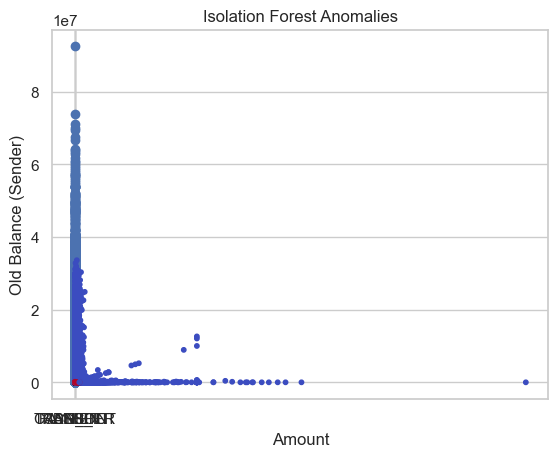

In [62]:
x = X_sample.values
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
# plt.scatter(x[index,0], x[index,1], edgecolors="r")
plt.scatter(X_sample["amount"], X_sample["oldbalanceOrg"], c=predictions, cmap="coolwarm", s=10)
# # Aliter:
# X_encoded = preprocessor.fit_transform(X_sample)
# plt.scatter(
#     X_encoded[:, 0],  # first numeric/encoded feature
#     X_encoded[:, 1],  # second numeric/encoded feature
#     c=predictions,
#     cmap="coolwarm",
#     s=10
# )
plt.title("Isolation Forest Anomalies")
plt.xlabel("Amount")
plt.ylabel("Old Balance (Sender)")
plt.show()

### 📈 ROC Curve and AUC Score

In [63]:
y_proba = pipeline.predict_proba(X_test)[:, 1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

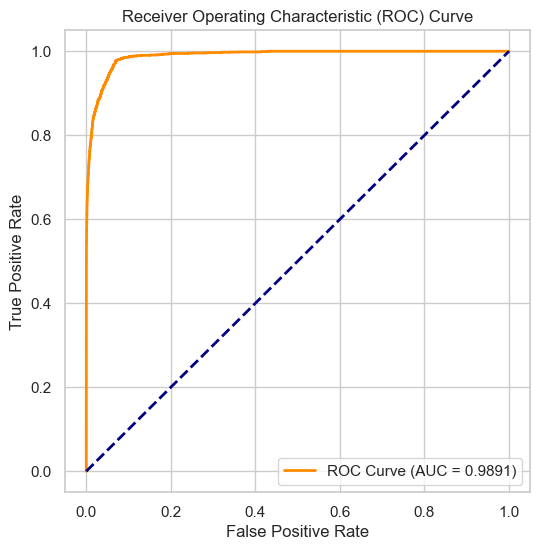

In [65]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

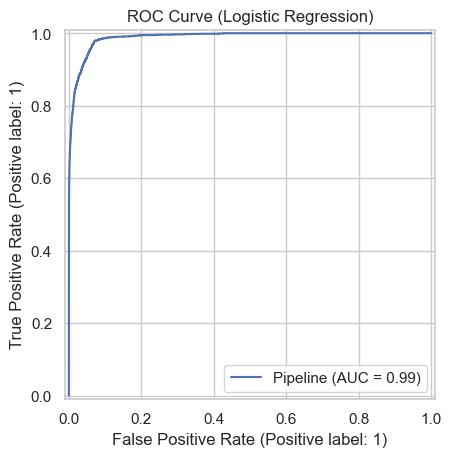

In [66]:
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve (Logistic Regression)")
plt.show()

In [67]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {roc_auc:.4f}")

AUC Score: 0.9891


### 🏋🏻‍♂️ Train XGBClassifier

In [ ]:
# model = XGBClassifier()
# model.fit(X_train, y_train)
# y_pred5 = model.predict(X_test)
# cm_xg = confusion_matrix(y_test, y_pred5)
# print('Confusion matrix for Normal XGBoost')
# print(cm_xg)
# probs = model.predict_proba(X_test)
# probs = probs[:, 1]
# auc_xg = roc_auc_score(y_test, probs)
# print('AUC for Normal XGboost: %.3f' % auc_xg)
# fpr, tpr, thresholds = roc_curve(y_test, probs)
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.plot(fpr, tpr, marker='.')
# plt.show()

### 📁 Web-App Helper File

In [68]:
import joblib
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']

## 🚀 Next Steps

With the baseline logistic regression model established, we can now focus on improving predictive performance and model robustness.

### Recommended next actions:
- **Model improvements:**
  - Train advanced models like **Random Forest**, **XGBoost**, or **LightGBM**.
  - Use **GridSearchCV** or **RandomizedSearchCV** for hyperparameter tuning.
  - Evaluate models with **precision-recall** and **ROC-AUC** curves due to class imbalance.

- **Feature engineering:**
  - Create derived features capturing **transaction frequency**, **average transaction amount**, or **recent balance change trends**.
  - Encode transaction behavior patterns for each user (e.g., ratio of fraudulent to total transactions).

- **Handling imbalance:**
  - Apply **SMOTE** (Synthetic Minority Oversampling Technique) or **undersampling** to balance the dataset.
  - Alternatively, explore **anomaly detection** models for rare fraud events.

- **Model evaluation:**
  - Use **cross-validation** to ensure consistent performance.
  - Report metrics beyond accuracy, focusing on **recall** (to minimize missed frauds).

- **Deployment readiness:**
  - Convert the trained pipeline into a deployable API using **Flask** or **FastAPI**.
  - Save predictions and logs for interpretability and audit trails.

---

🧾 *These next steps will help evolve the project from a baseline fraud detection model to a robust, production-ready CCFD (Credit Card Fraud Detection) system.*

Fraud Detection Workflow: EDA → Feature Engineering → Model Training → Evaluation → Deployment

### Notes
10000 – 500 = 9500 ≠ 9400 → there’s a 100 unit mismatch.<br>
Your model may have learned that imbalanced accounts after transfer look normal, not fraudulent, depending on training data.<br>
So the prediction might be numerically consistent with training, not logically intuitive.